# Logistic Regression - Binary Classification
> 참고
1. https://www.youtube.com/watch?v=2FeWGgnyLSw&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=13
2. https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
3. https://bioinformaticsandme.tistory.com/156
4. https://github.com/deeplearningzerotoall/TensorFlow/blob/master/tf_2.x/lab-05-1-logistic_regression-eager.ipynb

본 노트북은 텐서플로우2.0을 사용하여 로지스틱 회귀를 구현하는데 목적이 있습니다.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1. 데이터 불러오기 및 전처리
* 데이터 불러오기
* 전처리
    * X,Y 나누기
    * 훈련용, 검증용 데이터 나누기

In [2]:
# 데이터 불러오기
data = np.loadtxt("diabetes.csv", delimiter=',', dtype=np.float32)

# 훈련용, 검증용 데이터 나누기
train_data, test_data = train_test_split(data, test_size=0.2)

# 훈련용 데이터
train_X = train_data[:,0:-1]
train_Y = train_data[:,[-1]]

# 검증용 데이터
test_X = test_data[:,0:-1]
test_Y = test_data[:,[-1]]

# 텐서플로우 상수로 변환.
train_X = tf.constant(train_X, dtype=tf.float32)
train_Y = tf.constant(train_Y, dtype=tf.float32)
test_X = tf.constant(test_X, dtype=tf.float32)
test_Y = tf.constant(test_Y, dtype=tf.float32)


## 2. 파라미터 설정
* 파라미터
* 하이퍼파라미터  
파라미터 랜덤 값 뽑는 메소드 : tf.random.normal

In [3]:
# 파라미터
W = tf.Variable(tf.ones([8,1]), dtype=tf.float32) # 데이터의 Feature이 8개이며, 뉴럴네트워크로 치면 1개층이므로 [8,1]
b = tf.Variable(tf.zeros([1],dtype=tf.float32))

# 하이퍼파라미터
learning_rate = 0.01
num_epochs = 10000

## 3. 함수 정의
* 가설함수
* 비용함수
* 경사하강법
* 정확도 측정

In [4]:
def hypothesis(x):
    return tf.sigmoid(tf.matmul(x,W)+b)
# return tf.div(1., 1. + tf.exp(z))

def cost_function(y_true, y_pred):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + ( 1 - y_true) * tf.math.log( 1 - y_pred ))

def run_optimizer(x,y):
    with tf.GradientTape() as tape:
        predict = hypothesis(x)
        cost = cost_function(y, predict)

    dJ_dW, dJ_db = tape.gradient(cost,[W,b])
    W.assign_sub(learning_rate*dJ_dW)
    b.assign_sub(learning_rate*dJ_db)

# 또 다른 경사하강법 코드. ( 참고 )
# def gradient_descent(hypothesis, labels):
#     with tf.GradientTape() as tape:
#         loss_value = loss_fn(hypothesis, labels)
#     return tape.gradient(loss_value,[W,b])
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
    
# 모델 정확도 측정
def accuracy(y_true, y_pred):
    predict = tf.round(y_pred)
    correct = tf.cast(tf.equal(predict, y_true), dtype=tf.float32)
    accuracy = tf.reduce_mean(correct)
    return accuracy

## 4. 훈련 및 정확도 측정

In [6]:
cost_log = []
accuracy_log = []
for epoch in range(num_epochs):

    run_optimizer(train_X, train_Y)

    if(epoch % 100 == 0):
        cost_log.append(cost_function(train_Y, hypothesis(train_X)).numpy())
        accuracy_log.append(accuracy(train_Y,hypothesis(train_X)).numpy())
        print("epoch:",epoch,"cost:",cost_function(train_Y, hypothesis(train_X)).numpy(),"train_data_accuracy:",accuracy(train_Y,hypothesis(train_X)).numpy(),"test_data_accuracy:",accuracy(test_Y,hypothesis(test_X)).numpy())

epoch: 0 cost: 0.85814065 train_data_accuracy: 0.42174628 test_data_accuracy: 0.34868422
epoch: 100 cost: 0.8188835 train_data_accuracy: 0.48434925 test_data_accuracy: 0.41447368
epoch: 200 cost: 0.7931925 train_data_accuracy: 0.5436573 test_data_accuracy: 0.5131579
epoch: 300 cost: 0.77321506 train_data_accuracy: 0.5749588 test_data_accuracy: 0.56578946
epoch: 400 cost: 0.7559835 train_data_accuracy: 0.61285007 test_data_accuracy: 0.59210527
epoch: 500 cost: 0.7403588 train_data_accuracy: 0.6276771 test_data_accuracy: 0.625
epoch: 600 cost: 0.7258868 train_data_accuracy: 0.6408567 test_data_accuracy: 0.6381579
epoch: 700 cost: 0.7123705 train_data_accuracy: 0.6490939 test_data_accuracy: 0.6447368
epoch: 800 cost: 0.6997102 train_data_accuracy: 0.6523888 test_data_accuracy: 0.6513158
epoch: 900 cost: 0.68784225 train_data_accuracy: 0.6540362 test_data_accuracy: 0.6513158
epoch: 1000 cost: 0.67671746 train_data_accuracy: 0.6540362 test_data_accuracy: 0.6513158
epoch: 1100 cost: 0.666291

epoch: 9100 cost: 0.49147522 train_data_accuracy: 0.76441514 test_data_accuracy: 0.79605263
epoch: 9200 cost: 0.4911943 train_data_accuracy: 0.76276773 test_data_accuracy: 0.79605263
epoch: 9300 cost: 0.4909214 train_data_accuracy: 0.76276773 test_data_accuracy: 0.79605263
epoch: 9400 cost: 0.49065623 train_data_accuracy: 0.76276773 test_data_accuracy: 0.79605263
epoch: 9500 cost: 0.49039847 train_data_accuracy: 0.76276773 test_data_accuracy: 0.79605263
epoch: 9600 cost: 0.490148 train_data_accuracy: 0.76441514 test_data_accuracy: 0.79605263
epoch: 9700 cost: 0.4899046 train_data_accuracy: 0.76441514 test_data_accuracy: 0.79605263
epoch: 9800 cost: 0.48966786 train_data_accuracy: 0.76441514 test_data_accuracy: 0.79605263
epoch: 9900 cost: 0.48943785 train_data_accuracy: 0.7660626 test_data_accuracy: 0.79605263


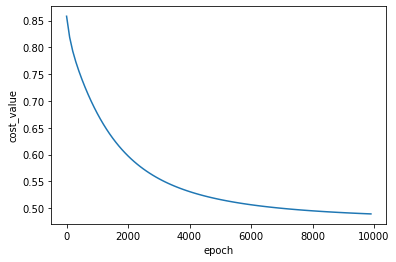

In [8]:
# 비용함수 시각화
plt.plot(np.arange(0,10000,100),cost_log,label="cost_value")
plt.xlabel("epoch")
plt.ylabel("cost_value")
plt.show()

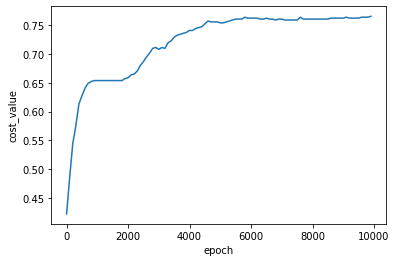

In [9]:
# 정확도 시각화
plt.plot(np.arange(0,10000,100),accuracy_log,label="accuracy")
plt.xlabel("epoch")
plt.ylabel("cost_value")
plt.show()